<strong>Task 1. Image classification + OOP<strong>

<p>In this task, you need to use a publicly available simple MNIST dataset and build 3 classification models around it. It should be the following models:</p>
<ol> 1. Random Forest;</ol>
<ol> 2. Feed-Forward Neural Network;</ol>
 <ol>   3. Convolutional Neural Network;</ol>
<p>Each model should be a separate class that implements MnistClassifierInterface with 2 abstract methods - train and predict. Finally, each of your three models should be hidden under another MnistClassifier class. MnistClassifer takes an algorithm as an input parameter.</p>
<p>Possible values for the algorithm are: cnn, rf, and nn for the three models described above.</p>


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from abc import ABC, abstractmethod
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [7]:
# Loading MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
# Dataset analysis
print("Training set dimensions:", X_train.shape)
print("Test set dimensions:", X_test.shape)
print("Unique class labels:", np.unique(y_train))
print("Class label distribution in the training set:")
print(pd.Series(y_train).value_counts())

Training set dimensions: (60000, 28, 28)
Test set dimensions: (10000, 28, 28)
Unique class labels: [0 1 2 3 4 5 6 7 8 9]
Class label distribution in the training set:
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


In [11]:
# Normalization and preparation
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [13]:
# Interface class
class MnistClassifierInterface(ABC):
    @abstractmethod
    def train(self, X_train, y_train):
        pass
    
    @abstractmethod
    def predict(self, X_test):
        pass

In [17]:
# Random Forest Classifier
class RandomForestMnistClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    def train(self, X_train, y_train):
        self.model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    
    def predict(self, X_test):
        return self.model.predict(X_test.reshape(X_test.shape[0], -1))

In [19]:
# Feed-Forward Neural Network Classifier
class FeedForwardMnistClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = Sequential([
            Flatten(input_shape=(28, 28)),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(10, activation='softmax')
        ])
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    def train(self, X_train, y_train):
        self.model.fit(X_train, to_categorical(y_train), epochs=5, batch_size=32, verbose=1)
    
    def predict(self, X_test):
        return np.argmax(self.model.predict(X_test), axis=1)

In [21]:
# Convolutional Neural Network Classifier
class CnnMnistClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = Sequential([
            Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
            MaxPooling2D(pool_size=(2,2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
        ])
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    def train(self, X_train, y_train):
        self.model.fit(X_train, to_categorical(y_train), epochs=5, batch_size=32, verbose=1)
    
    def predict(self, X_test):
        return np.argmax(self.model.predict(X_test), axis=1)

In [23]:
# Class for model selection
class MnistClassifier:
    def __init__(self, algorithm):
        if algorithm == 'rf':
            self.classifier = RandomForestMnistClassifier()
        elif algorithm == 'nn':
            self.classifier = FeedForwardMnistClassifier()
        elif algorithm == 'cnn':
            self.classifier = CnnMnistClassifier()
        else:
            raise ValueError("Unknown algorithm. Use 'rf', 'nn', or 'cnn'")
    
    def train(self, X_train, y_train):
        self.classifier.train(X_train, y_train)
    
    def predict(self, X_test):
        return self.classifier.predict(X_test)

In [25]:
# Function for model evaluation, visualization of confusion matrix and predicted labels
def evaluate_model(model, X_test, y_test, model_name, X_test_raw):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", acc)

    # Calculation and visualization of the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

    # Classification report output
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))

    # Visualization of 10 random test images with predicted labels
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    indices = np.random.choice(len(y_test), size=10, replace=False)  # Random selection of 10 samples
    for i, ax in enumerate(axes.flat):
        index = indices[i]
        ax.imshow(X_test_raw[index], cmap="gray")
        ax.set_title(f"True: {y_test[index]}, Pred: {y_pred[index]}", color="green" if y_test[index] == y_pred[index] else "red")
        ax.axis("off")
    plt.show()

Random Forest Accuracy: 0.9704


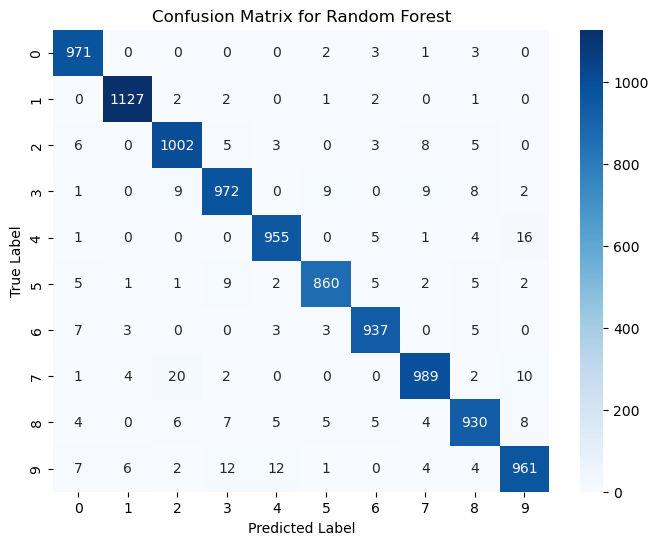

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



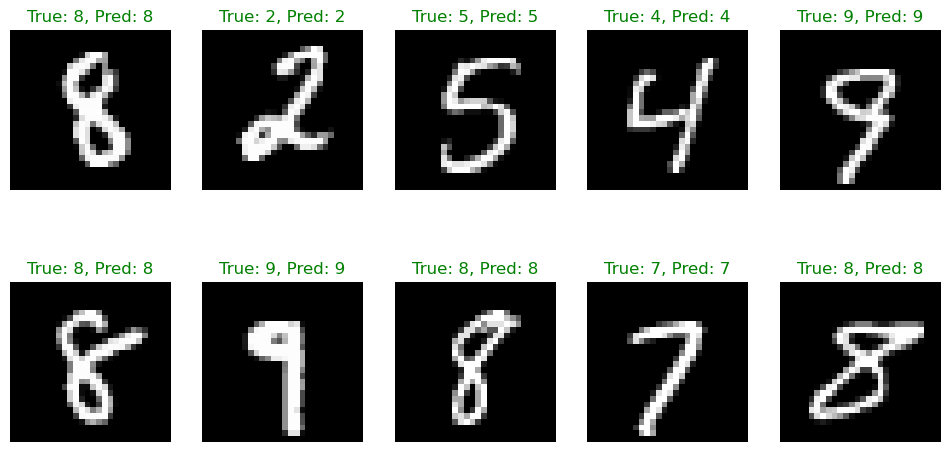

In [27]:
# Testing the Random Forest model
model_rf = MnistClassifier('rf')
model_rf.train(X_train, y_train)
evaluate_model(model_rf, X_test, y_test, "Random Forest", X_test)

<strong>Overall Model Performance</strong>
    <p>The Random Forest model achieved an accuracy of 97.04%, which is a high result for an algorithm that does not utilize deep learning. This level of performance indicates effective recognition of most handwritten digits, though certain classes exhibit increased misclassification rates.</p>

<strong>Classification Metrics</strong>
    <p>Precision, Recall, and F1-score for all classes range between 0.96-0.99, indicating well-balanced classification.</p>
    <p>The "9" class demonstrates the most significant challenge, with a recall of 0.95, suggesting that this digit is more frequently misclassified.</p>
    <p>The "5" class also has a slightly lower recall (0.96), likely due to its visual similarity to digits like "3" or "8."</p>

<strong>Confusion Matrix Analysis</strong>
    <p>From the confusion matrix, we observe that the model primarily makes errors in the following cases:</p>
        <li>"5" is classified as "3" or "8" – possibly due to the similarity in handwritten representation. </li>
        <li>"9" is misclassified as "4," "7," or "8", which may result from the way these digits are written.</li>
        <li>"7" has some misclassification as "2" and "9", indicating a need for better differentiation among these digits.</li>

<strong>Conclusion</strong>
    <p>Random Forest has demonstrated excellent performance, achieving 97.04% accuracy on the MNIST dataset. However, confusion matrix analysis has revealed systematic misclassifications, which could be mitigated by further model improvements or transitioning to more powerful approaches such as deep neural networks.</p>

Epoch 1/5


C:\Users\ConceptD\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8813 - loss: 0.4217
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9686 - loss: 0.1049
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9801 - loss: 0.0661
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9839 - loss: 0.0521
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9866 - loss: 0.0405
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Feed-Forward NN Accuracy: 0.9784


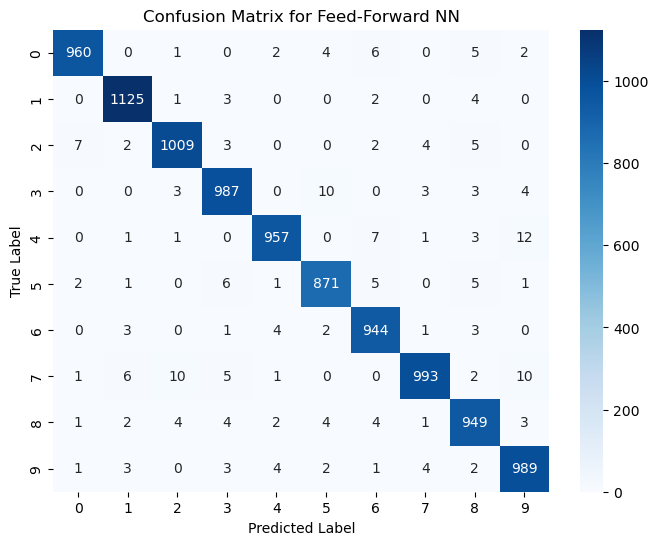

Classification Report for Feed-Forward NN:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



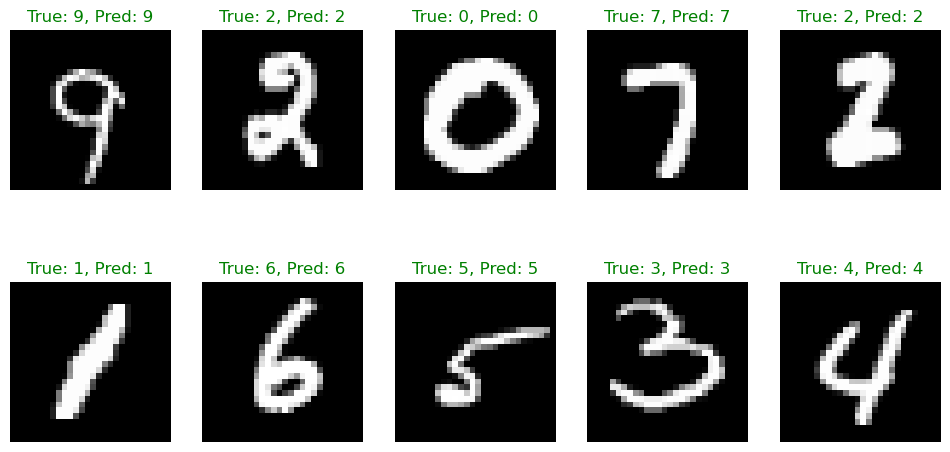

In [31]:
# Testing the Feed-Forward Neural Network model
model_nn = MnistClassifier('nn')
model_nn.train(X_train, y_train)
evaluate_model(model_nn, X_test, y_test, "Feed-Forward NN", X_test)

<strong>Overall Model Performance</strong>
    <p>The Feed-Forward Neural Network (FFNN) achieved an accuracy of 97.84%, which surpasses the 97.04% accuracy of Random Forest. This improvement is expected, as neural networks can better capture complex patterns in image data.</p>
    <p>During training, the model demonstrated:</p>
        <li>Rapid convergence: Accuracy improved from 88.13% (Epoch 1) to 98.66% (Epoch 5).</li>
        <li>Stable loss reduction: The loss decreased from 0.4217 to 0.0405, indicating effective optimization.</li>

<strong>Classification Metrics</strong>
    <p>Precision, Recall, and F1-score for all classes are ~0.97-0.99, showing strong classification performance.</p>
    <p>The highest recall (0.99) is observed for digits 1 and 6, meaning these classes are recognized almost perfectly.</p>
    <p>The lowest recall (0.97) appears for digits 4, 8, and 7, suggesting slightly more misclassification compared to other classes.</p>

<strong>Confusion Matrix Analysis</strong>
    <p>"4" is sometimes predicted as "9" or "7", which aligns with their handwritten similarities.</p>
    <p>"5" is occasionally misclassified as "3", similar to the issue in the Random Forest model.</p>
    <p>"7" shows some confusion with "2" and "9", which may be due to writing variations.</p>

<strong>Conclusion</strong>
    <p>The Feed-Forward Neural Network significantly outperforms Random Forest, achieving higher accuracy (97.84%) and better classification metrics across all digits. However, some confusion between visually similar digits remains. The next step would be to compare these results with a Convolutional Neural Network (CNN), which is expected to further improve accuracy by leveraging spatial hierarchies in the MNIST dataset.</p>

Epoch 1/5


C:\Users\ConceptD\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9174 - loss: 0.2867
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9845 - loss: 0.0511
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9911 - loss: 0.0283
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9943 - loss: 0.0188
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9961 - loss: 0.0122
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
CNN Accuracy: 0.9864


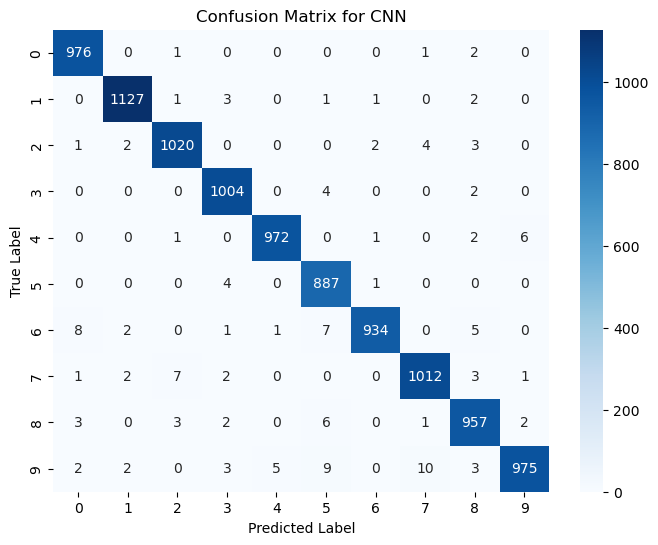

Classification Report for CNN:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



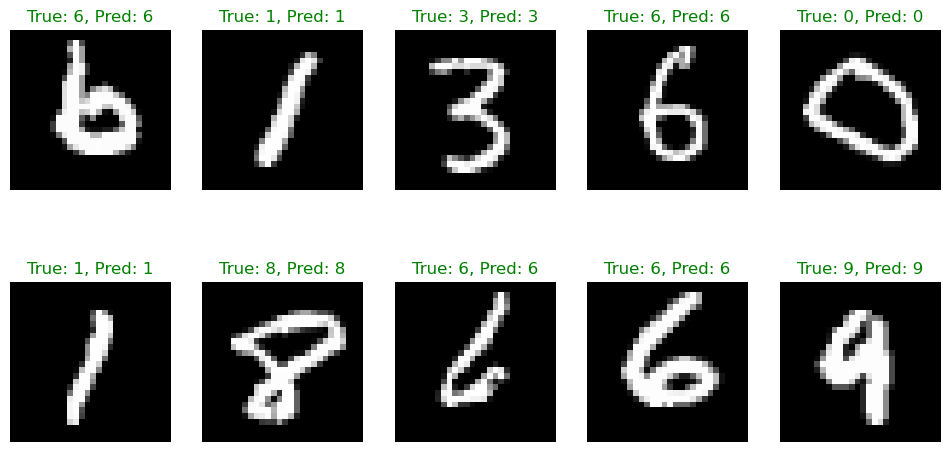

In [33]:
# Testing the Convolutional Neural Network model
model_cnn = MnistClassifier('cnn')
model_cnn.train(X_train_cnn, y_train)
evaluate_model(model_cnn, X_test_cnn, y_test, "CNN", X_test)

<strong>Overall Model Performance</strong>
    <p>The Convolutional Neural Network (CNN) achieved an accuracy of 98.64%, outperforming both the Feed-Forward Neural Network (97.84%) and Random Forest (97.04%). This performance aligns with expectations, as CNNs are inherently better suited for image classification tasks due to their ability to capture spatial patterns.</p>
   <p>During training:</p>
        <li>Rapid improvement in accuracy: Jumped from 91.74% (Epoch 1) to 99.61% (Epoch 5).</li>
        <li>Loss reduction: Decreased from 0.2867 to 0.0122, indicating a well-optimized model with minimal overfitting.</li>

<strong>Classification Metrics</strong>
    <p>Precision, Recall, and F1-score are consistently above 0.98 across all classes, demonstrating the robustness of the model.</p>
    <p>Highest recall (1.00) for digit 0, meaning the model classified all instances correctly.</p>
    <p>Lower recall (0.97) for digits 6 and 9, suggesting occasional misclassifications.</p>

<strong>Confusion Matrix Analysis</strong>
    <p>Most digits are classified correctly with very few errors.</p>
    <p>Misclassifications are minimal and mainly occur between visually similar digits:</p>
       <li> "6" is confused with "0" and "5".</li>
       <li> "9" is sometimes misclassified as "4" or "5".</li>
        <li> "7" shows minor misclassification as "2".</li>

<strong>Conclusion</strong>
    <p>The CNN clearly outperforms both FFNN and Random Forest, confirming its superiority for image classification tasks. It achieves higher accuracy (98.64%), fewer misclassifications, and better recall across all digits.</p>

<center><strong>Final Analysis: Random Forest vs. Feed-Forward NN vs. CNN<strong></center>

    Random Forest (97.04%): Fast and interpretable but struggles with complex digit shapes, leading to misclassifications (e.g., 5 vs. 3, 9 vs. 4).
    Feed-Forward NN (97.84%): Handles non-linear patterns better than RF but still confuses similar digits (e.g., 7 vs. 2, 4 vs. 9).
    CNN (98.64%): Best performer, leveraging spatial hierarchies to minimize errors. Some minor misclassifications (e.g., 9 vs. 4) remain, but overall, CNN generalizes the best.
    Conclusion:
        For quick, explainable results → Random Forest.
        For balanced performance → Feed-Forward NN.
        For the best accuracy → CNN is the clear winner.
    Further improvements can be made through data augmentation, deeper architectures, and hyperparameter tuning.